# Question 3: Education Level and income
Guiding question: Is the Education level of the head of the household related to household income? 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
bmx = pd.read_sas('BMX_I.XPT')
demo = pd.read_sas('DEMO_I.XPT')
#combine two tables together
finalData = pd.merge(left = demo,right = bmx,on = 'SEQN')


Use the variable: INDHHIN2 for household income. Use DMDHREDU for the education level of the head of the household.

Filter to adults aged 20 and older.

In [2]:
adultData = finalData.loc[finalData.loc[:,'RIDAGEYR']>=20]
adultData=adultData.dropna(how='any',subset=['INDHHIN2','DMDHREDU'])

Remove people who are missing, refused to answer, or didn’t know the household income or education levels.

Remove household income categories 12 (\$20,000 and over) and 13 (under \$20,000) as they don’t quite fit in with the other income categories.

In [3]:
adultData=adultData.loc[adultData.loc[:,'INDHHIN2']!=77.0]
adultData=adultData.loc[adultData.loc[:,'INDHHIN2']!=99.0]
adultData=adultData.loc[adultData.loc[:,'INDHHIN2']!=12.0]
adultData=adultData.loc[adultData.loc[:,'INDHHIN2']!=13.0]
adultData=adultData.loc[adultData.loc[:,'DMDHREDU']!=7.0]
adultData=adultData.loc[adultData.loc[:,'DMDHREDU']!=9.0]

Print the shape of the resulting data before the next step

In [4]:
print(adultData.shape)

(4720, 72)


Summarize and display the data to explore the relationship between education level and income.

Text(0,0.5,'Income')

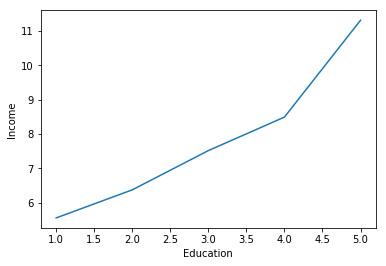

In [5]:
adultData = adultData.loc[:,['INDHHIN2','DMDHREDU','SEQN']]
countData = adultData.groupby(['DMDHREDU']).mean()

test = adultData.groupby('DMDHREDU')['INDHHIN2'].mean()


plt.plot(countData.index,countData.loc[:,'INDHHIN2'])
plt.xlabel('Education')
plt.ylabel('Income')

INDHHIN2  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  14.0  \
DMDHREDU                                                                     
1.0         23    51    80    62    63    76    56    34    16    13    17   
2.0         25    43    62    48    49    79    71    50    38    29    27   
3.0         31    45    80    97    73   155   102   109    63    50    74   
4.0         24    42    78    92   109   183   173   159   115    81   166   
5.0         12    15    21    36    38    79    95    70    96    87   202   

INDHHIN2  15.0  
DMDHREDU        
1.0         18  
2.0         24  
3.0        117  
4.0        211  
5.0        486  


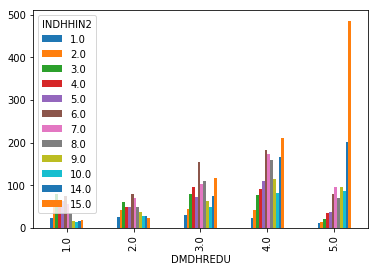

In [6]:
countData = adultData.pivot_table(index = 'DMDHREDU', columns = 'INDHHIN2', values = 'SEQN',aggfunc = 'count')
countData.plot(kind='bar')
print(countData)